### 이상치 데이터
* 이상치
    - IQR의 1.5배 또는 3배의 차이가 나면 이상치라고 표현한다
    - 다른 데이터보다 아주 작거나 큰 값을 말한다
    - 데이터를 분석할 때 이상치는 의사결정에 영향을 미칠 수 있다.
* 이상치 처리
    1. 제거
        - 오타, 오류, 비상식적 값들은 단순히 제거한다
    2. 치환
        - 평균, 최빈값, 중앙값(중위수)
* 이상치 구하기
    - 1/4 분위값 25%, 2/4 분위값 중앙값(median), 3/4 분위값 75%
    - IQR = Q3(3사분위) - Q1(1사분위)
    - 최대 이상치 = Q3(3사분위) + IQR * 1.5(3.0)
    - 최저 이상치 = Q1(1사분위) - IQR * 1.5(3.0)

In [22]:
import pandas as pd
df = pd.read_csv('data/food.csv')
df.head()

,food_a,food_b,food_c
0,20,5,5
1,21,6,5
2,23,11,5
3,22,13,12
4,26,15,10


In [23]:
df.mean()

food_a    47.407407
food_b    51.037037
food_c    42.407407
dtype: float64

In [24]:
df.describe() # std = 표준편차(표준편차는 낮을수록 신뢰성이 높음)


,food_a,food_b,food_c
count,27.000000,27.000000,27.000000
mean,47.407407,51.037037,42.407407
std,20.267935,110.789295,64.268822
min,20.000000,5.000000,5.000000
25%,38.000000,20.000000,20.000000
50%,46.000000,30.000000,31.000000
75%,57.000000,41.500000,45.500000
max,120.000000,600.000000,350.000000


In [25]:
import numpy as np
test_median = [1,2,3,4,5,6,7,8,9,10]
print( '평균', np.median( test_median ) )
"중앙 값 : ", np.median( test_median )

평균 5.5


('중앙 값 : ', 5.5)

In [26]:
food_a_median = np.median( df['food_a'] )
food_b_median = np.median( df['food_b'] )
food_c_median = np.median( df['food_c'] )

print('food_a_median : ', food_a_median)
print('food_b_median : ', food_b_median)
print('food_c_median : ', food_c_median)
print('평균\n', df.mean())

food_a_median :  46.0
food_b_median :  30.0
food_c_median :  31.0
평균
 food_a    47.407407
food_b    51.037037
food_c    42.407407
dtype: float64


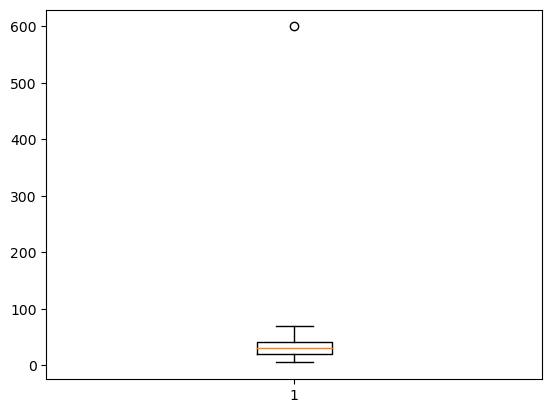

In [27]:
import matplotlib.pyplot as plt
plt.boxplot(df['food_b'])
plt.show() #시각화해주는 애임.

In [28]:
test_median = {-4, 2, 3, 4, 5, 6, 7, 8, 9, 15}
df_test = pd.DataFrame(test_median)
df_test

,0
0,2
1,3
2,4
3,5
4,6
5,7
6,8
7,9
8,15
9,-4


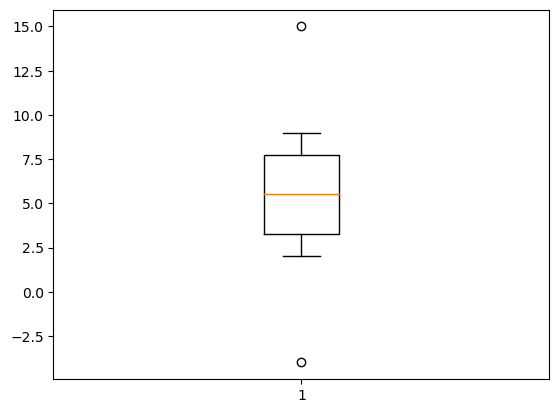

In [29]:
plt.boxplot( df_test[0] )
plt.show()

* IQR = Q3(3사분위) - Q1(1사분위)
* 최대 이상치 = Q3(3사분위) + IQR * 1.5(3.0)
* 최저 이상치 = Q1(1사분위) - IQR * 1.5(3.0)

In [31]:
df_test.describe()

,0
count,10.000000
mean,5.500000
std,4.972145
min,-4.000000
25%,3.250000
50%,5.500000
75%,7.750000
max,15.000000


In [32]:
print( df_test.describe() )

               0
count  10.000000
mean    5.500000
std     4.972145
min    -4.000000
25%     3.250000
50%     5.500000
75%     7.750000
max    15.000000


In [39]:
print( df_test.describe().loc['25%'] )
q1 = df_test.describe().loc['25%'][0]
q1

0    3.25
Name: 25%, dtype: float64


3.25

In [40]:
print(df_test[0].describe())
q3 = df_test[0].describe()['75%']
q3

count    10.000000
mean      5.500000
std       4.972145
min      -4.000000
25%       3.250000
50%       5.500000
75%       7.750000
max      15.000000
Name: 0, dtype: float64


7.75

In [44]:
iqr = q3 - q1
lowerfence = q1 - iqr * 1.5  # 최저 이상치
upperfence = q3 + iqr * 1.5  # 최대 이상치

print("최저 이상치 : ", lowerfence)
print("최대 이상치 : ", upperfence)

최저 이상치 :  -3.5
최대 이상치 :  14.5


In [53]:
df_test = df_test[(df_test[0] >= lowerfence) & (df_test[0] <= upperfence)]
df_test

,0
0,2
1,3
2,4
3,5
4,6
5,7
6,8
7,9


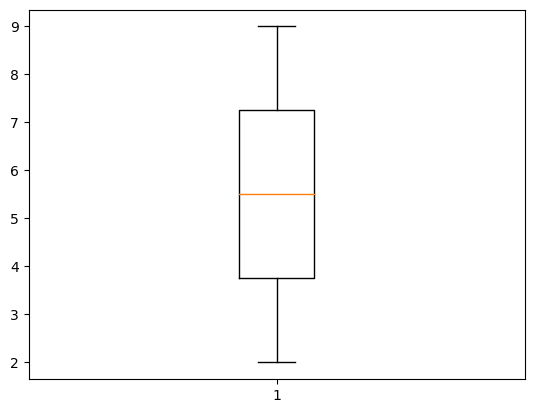

In [54]:
plt.boxplot( df_test[0] )
plt.show()

In [55]:
df_test = pd.DataFrame(test_median)
df_test

,0
0,2
1,3
2,4
3,5
4,6
5,7
6,8
7,9
8,15
9,-4


In [61]:
df_test[(df_test[0] > upperfence) | (df_test[0] < lowerfence)]=df_test[0].describe().loc['50%']

C:\Users\user\AppData\Local\Temp\ipykernel_9340\3732675971.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test[(df_test[0] > upperfence) | (df_test[0] < lowerfence)]=df_test[0].describe().loc['50%']


In [62]:
df_test

,0
0,2.0
1,3.0
2,4.0
3,5.0
4,6.0
5,7.0
6,8.0
7,9.0
8,5.5
9,5.5


In [63]:
df_test.reset_index(drop=True) # 중간에 데이터가 삭제되면 index를 다시 재정의해줌

,0
0,2.0
1,3.0
2,4.0
3,5.0
4,6.0
5,7.0
6,8.0
7,9.0
8,5.5
9,5.5
